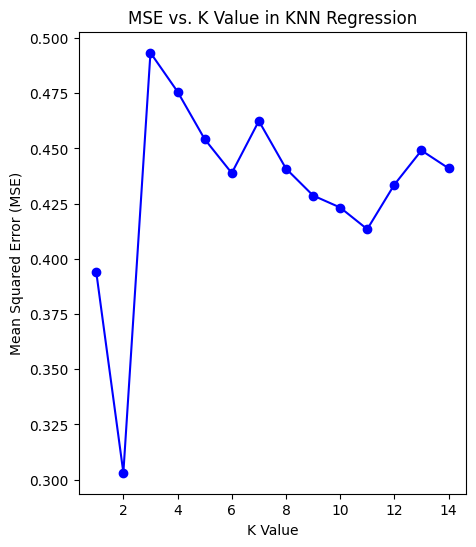

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('/content/Japan_life_expectancy.csv')
x = data.drop(['Prefecture', 'Life_expectancy'], axis=1)
y = data['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.25)

mse_values = []

k_values = np.arange(1, 15)

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)

    knn_regressor.fit(x_train, y_train)

    y_pred = knn_regressor.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the graph
plt.figure(figsize=(5, 6))
plt.plot(k_values, mse_values, marker='o', color='b')
plt.title('MSE vs. K Value in KNN Regression')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

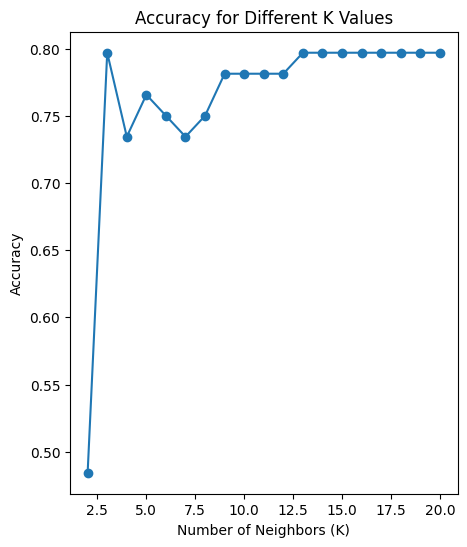

In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from pandas import isnull

Data = pd.read_csv('/content/breast_cancer_survival.csv')
df = pd.DataFrame(Data)

df['ER status']=df['ER status'].replace(['Positive','Negative'],['1','0'])
df['PR status']=df['PR status'].replace(['Positive','Negative'],['1','0'])
df['HER2 status']=df['HER2 status'].replace(['Positive','Negative'],['1','0'])
df['Patient_Status']=df['Patient_Status'].replace(['Alive','Dead'],['1','0'])
df['Tumour_Stage']=df['Tumour_Stage'].replace(['I','II','III'],['1','2','3'])


# Check and handle missing values
if df.isnull().any().any():
    # Handle missing values, e.g., df = df.dropna() or use imputation methods
    df = df.dropna()


y = df['Patient_Status']
x = df.drop(['Histology', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Patient_Status', 'Gender'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

k_values = list(range(2, 21))

accuracy_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(5, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.show()